In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
freedom = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-22/freedom.csv',
    col_types = cols()
)

# freedom data for countries between the years of 1995-2020

In [3]:
freedom |> head(1)

# CL = civil liberties
# PR = political rights
# is_ldc = is a least developed country (binary 0/1)
# for the Status variable: F = free, NF = not free, PF = partially free

country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1995,7,7,NF,142,Asia,1


--- Chart 1: Point Chart ---

In [4]:
freedom_sorted = freedom |> 
    filter(year == 2020) |>
    select(country, year, CL, PR, Status)

freedom_sorted |> head(1)

country,year,CL,PR,Status
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,2020,6,5,NF


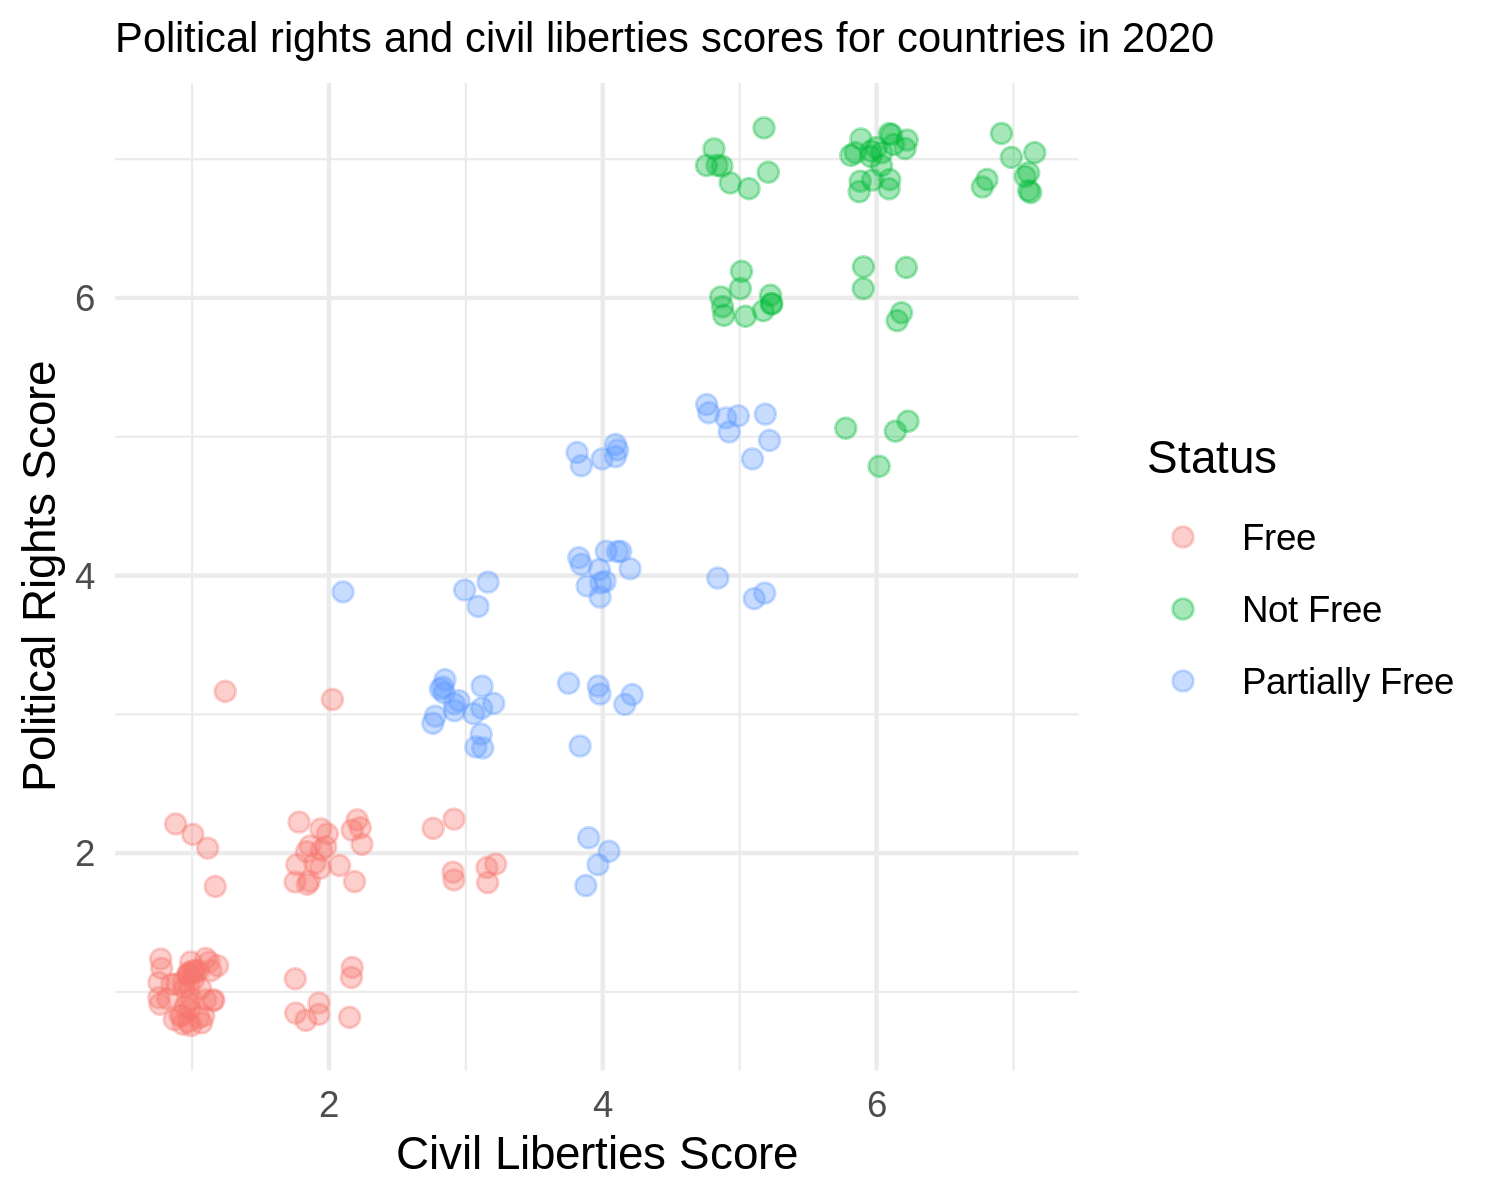

In [5]:
options(repr.plot.width=5, repr.plot.height=4)

p = ggplot(freedom_sorted, aes(x = CL, y = PR, color = Status)) + 
    geom_point(size = 2, position = position_jitter(h = 0.25, w = 0.25), alpha = 0.35) +
    labs(y = 'Political Rights Score', x = 'Civil Liberties Score', title = "Political rights and civil liberties scores for countries in 2020") +
    theme_minimal() + 
    theme(plot.title = element_text(size = 10)) + 
    scale_color_hue(labels=c('Free', 'Not Free', 'Partially Free'))

p

--- Chart 2: Bar Chart ---

In [6]:
free_freq_region = freedom |> 
    filter(year == 2020) |>
    filter(Status == "F") |>
    mutate(region = Region_Name |> fct_infreq() |> fct_rev())

free_freq_region |> head(10)

country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc,region
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>
Andorra,2020,1,1,F,150,Europe,0,Europe
Antigua and Barbuda,2020,2,2,F,19,Americas,0,Americas
Argentina,2020,2,2,F,19,Americas,0,Americas
Australia,2020,1,1,F,9,Oceania,0,Oceania
Austria,2020,1,1,F,150,Europe,0,Europe
Bahamas,2020,1,1,F,19,Americas,0,Americas
Barbados,2020,1,1,F,19,Americas,0,Americas
Belgium,2020,1,1,F,150,Europe,0,Europe
Belize,2020,1,2,F,19,Americas,0,Americas


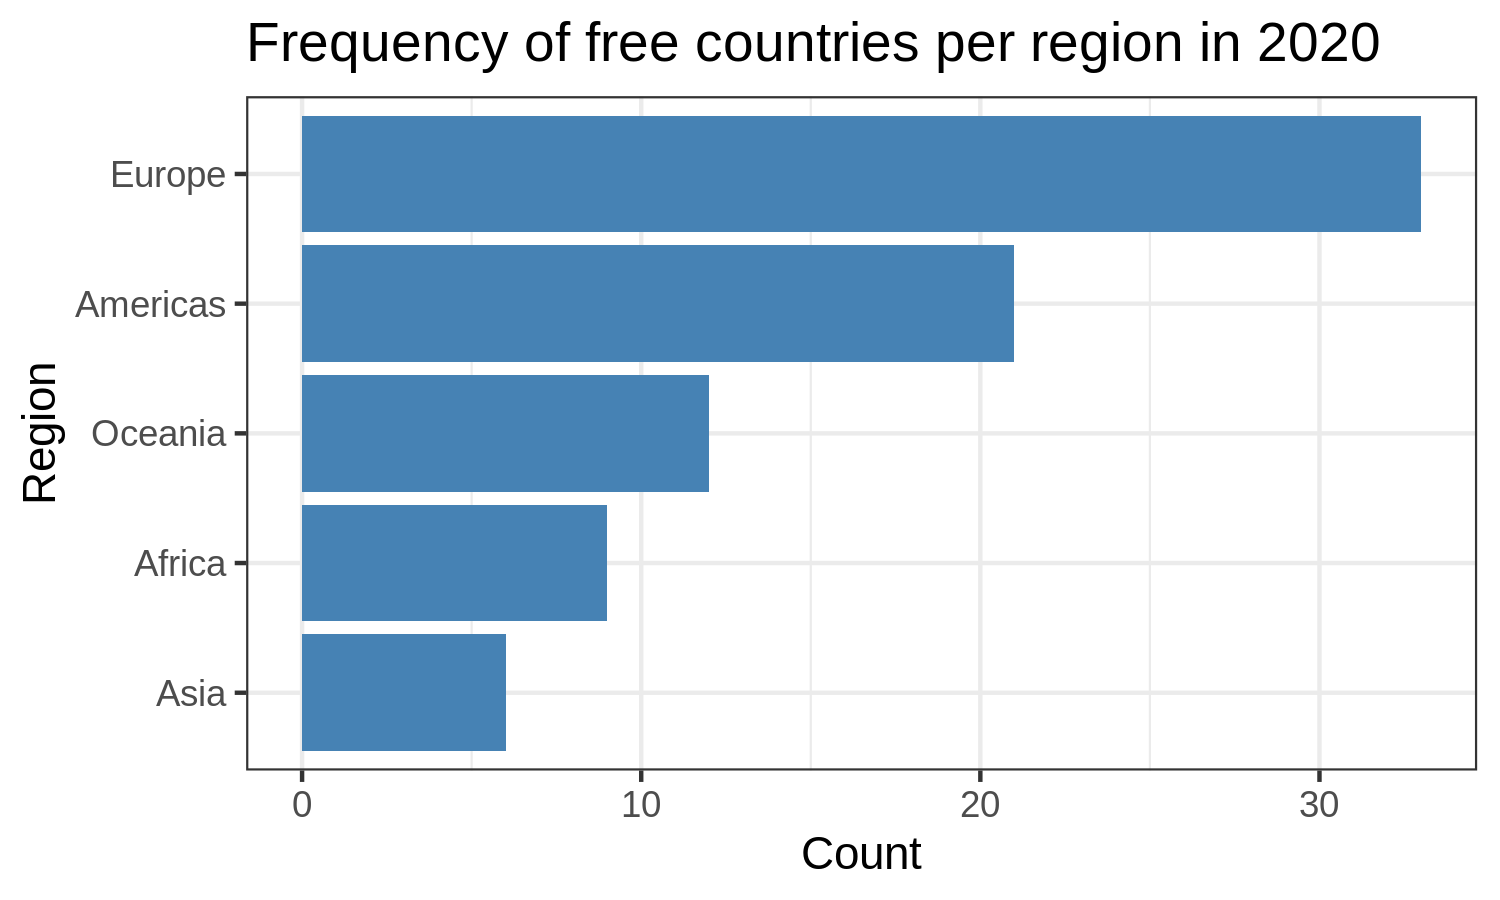

In [7]:
options(repr.plot.width=5, repr.plot.height=3)

q = ggplot(free_freq_region, aes(y = region)) + geom_bar(fill = 'steelblue') +
    labs(y = 'Region', x = 'Count', title = "Frequency of free countries per region in 2020") +
    theme_bw() 

q

--- Chart 3: Bar Chart ---

In [8]:
freedom_long = freedom |> 
    filter(year == 2020) |>
    group_by(Region_Name) |>
    summarize(political_rights = mean(PR), civil_liberties = mean(CL)) |>
    pivot_longer(c(political_rights, civil_liberties))

freedom_long

Region_Name,name,value
<chr>,<chr>,<dbl>
Africa,political_rights,4.814815
Africa,civil_liberties,4.444444
Americas,political_rights,2.514286
Americas,civil_liberties,2.571429
Asia,political_rights,4.978723
Asia,civil_liberties,4.829787
Europe,political_rights,1.860465
Europe,civil_liberties,1.837209
Oceania,political_rights,1.714286


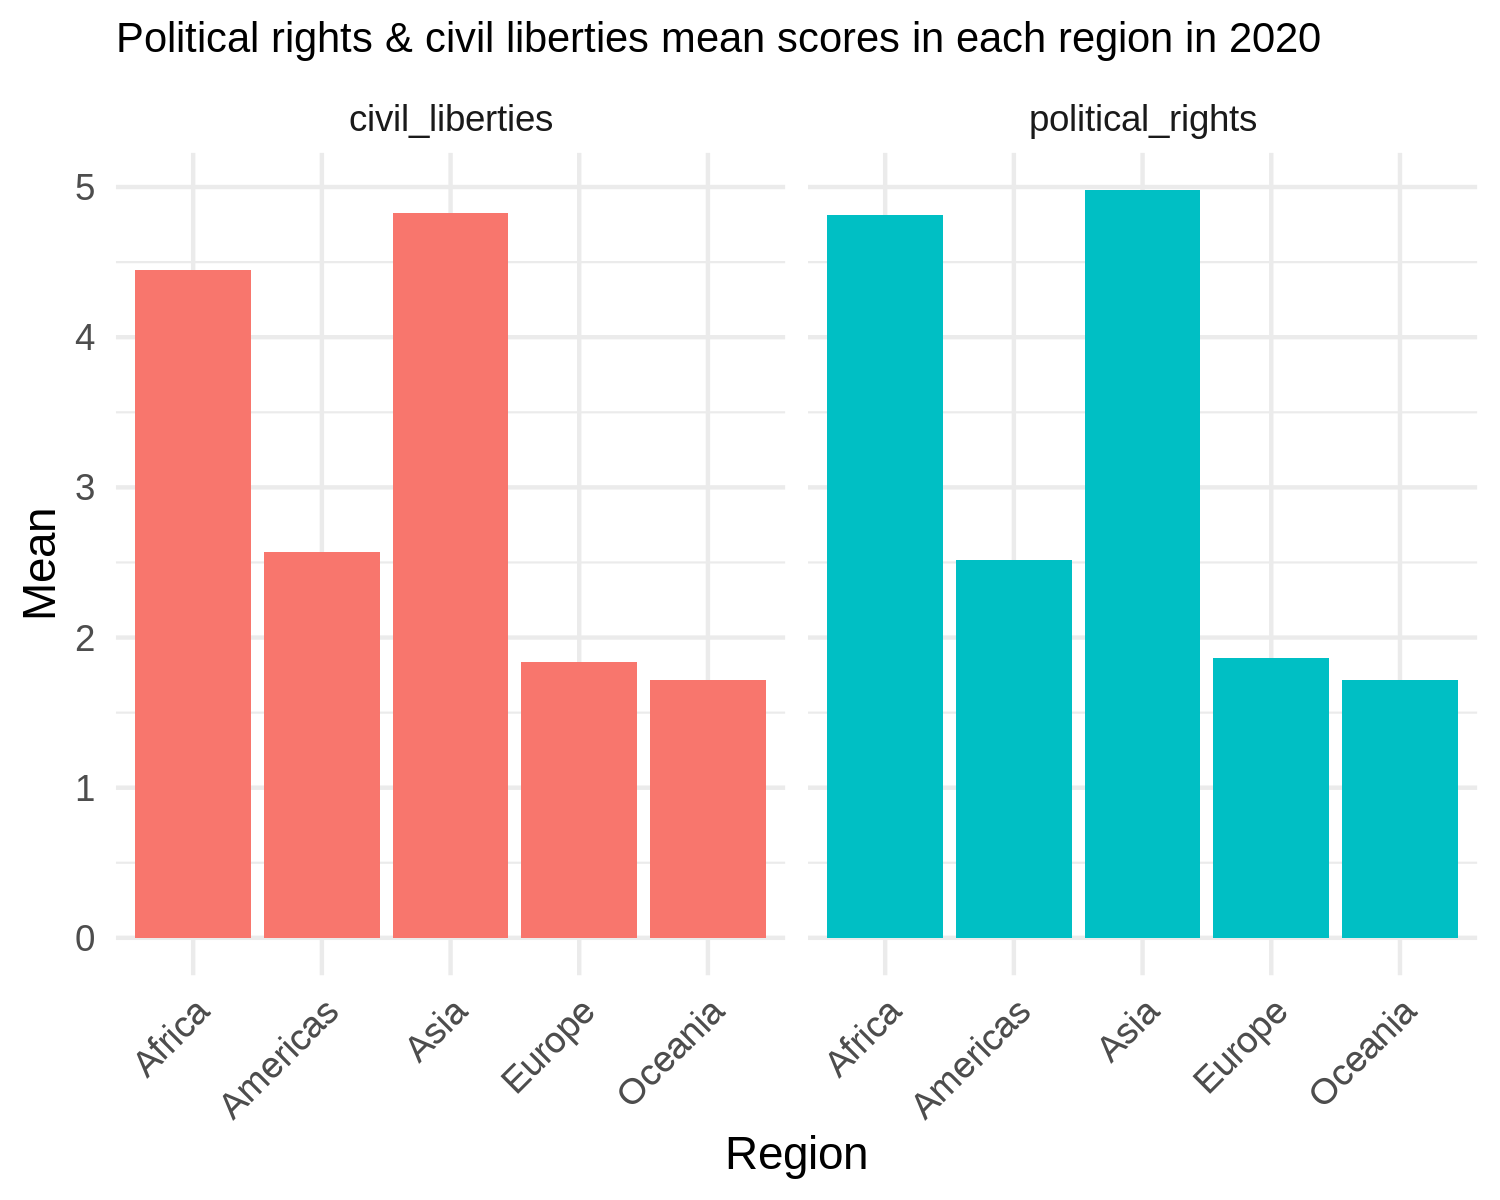

In [9]:
options(repr.plot.width=5, repr.plot.height=4)

w = ggplot(freedom_long, aes(x = Region_Name, y = value, fill = name)) + geom_col() + facet_wrap(~name) +
    labs(x = 'Region', y = 'Mean', title = "Political rights & civil liberties mean scores in each region in 2020") +
    theme_minimal() +
    theme(plot.title = element_text(size = 10)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(legend.position = "none") 

w

Analysis Paragraphs:

I chose the World Freedom Index data from the tidytuesday repository. I first started out by loading in the tidyverse library and then reading in the data. Then, I previewed the data to become familiar with it. For my first chart, I created a point chart that analyzes the relationship between the political rights and civil liberties scores and their freedom status for each country in the dataset in 2020. I created this chart by filtering the original data set to the year 2020, as this is the year that I’m focusing on for all of my analyses. Then, I selected only the columns that I want to work with for this chart. I used this new dataset to plot the points and adjusted the aesthetics and labels of the chart, with civil liberties on the x-axis, political rights on the y-axis, and colored points indicating the country’s freedom status as labeled on the legend. From this chart, it is clear that there is a strong, positive correlation between political rights and civil liberties. As the political rights scores increase, so do the civil liberties scores, with the highest scores (about 7 for both categories) belonging to the not free countries and lowest scores (about 1 for both categories) belonging to the free countries. Thus, the high scores are associated with less freedom while the lower scores are associated with greater freedom.

My second chart is a horizontal bar chart that shows the frequency of free countries per region in 2020. I created this chart by filtering the original dataset to the year 2020 and freedom status only, and then I used forcats and mutate functions to help create my frequencies for each region. I used this new dataset to plot the counts and adjusted the aesthetics and labels of the chart, with region on the y-axis and count on the x-axis. From this chart, we can see that Europe and the Americas have the highest count of free countries in 2020, with about 34 and 21 countries respectively. Asia and Africa have the lowest count of free countries in 2020, with about 6 and 9 countries respectively, even though they have the highest count of countries altogether. We can thus infer that more countries in Asia and Africa represent the points on the top, right side of the previous chart while more countries in Europe and the Americas represent the points in the lower, left side of the previous chart.

My third chart is two vertical bar charts side by side that show the political rights and civil liberties mean scores in each region in 2020. I created this chart by filtering the original dataset to the year 2020, grouping by region, summarizing the data to find the means for civil liberties and political rights for each region, and then pivoting the structure of this dataset to prepare it for plotting. I used this new dataset to plot the mean scores and adjusted the aesthetics and labels of the charts, with mean scores on the y-axis and region on the x-axis. I used the facet wrap function to create two bar charts, one for civil liberties mean scores and one for political rights mean scores in each region. From these charts, we can observe that the mean scores for both civil liberties and political rights are very similar in each region, so there is consistency of the scores in the two categories. Africa and Asia have the highest mean scores (between 4 and 5), which makes sense as they have the lowest counts of free countries. The Americas, Europe, and Oceania have lower mean scores (between 1 and 3), and these regions had more free countries. For Asia and Africa, there is only a little bit of a difference between the mean scores for both categories.